In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

In [2]:
df = make_moons()
df = pd.DataFrame(df[0], columns=['feature_1', 'feature_2'])
df

,feature_1,feature_2
0,1.000000,0.000000
1,-0.871319,0.490718
2,-0.761446,0.648228
3,1.518393,-0.355143
4,0.018441,0.308841
...,...,...
95,2.000000,0.500000
96,0.281651,-0.195683
97,0.997945,0.064070
98,-0.096023,0.995379


In [3]:
standard_scaler = StandardScaler()
df = pd.DataFrame(standard_scaler.fit_transform(df), columns=df.columns)

In [4]:
def kmeans(X, n_clusters):
    a, b = X.shape
    centroids = np.random.random((n_clusters, b))
    for _ in range(1000):
        distances = cdist(X, centroids)
        labels = np.argmin(distances, axis=1)
        for k in range(n_clusters):
            centroids[k] = np.mean(X[labels == k], axis=0)
    return labels

In [5]:
df['labels'] = kmeans(df, 2)

Text(0, 0.5, 'Feature 2')

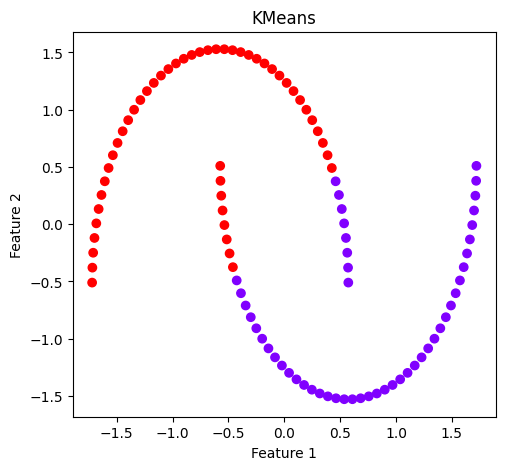

In [6]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.subplots_adjust(wspace=0.2)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['labels'], cmap="rainbow")
plt.title("KMeans")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")